**Importing the libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**DATA COLLECTION**

In [2]:
df = pd.read_csv(r"C:\Users\srihi\OneDrive\Desktop\idse project\placementdata.csv")

In [3]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [4]:
print(f"Columns in the dataset :{df.columns.tolist()}")

Columns in the dataset :['StudentID', 'CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks', 'HSC_Marks', 'PlacementStatus']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


**DATA CLEANING**


Checking for Duplicate values and Null values

In [6]:
duplicated_values = df.duplicated().sum()
null_values = df.isnull().sum()
print(f"No of duplicate values {duplicated_values}")
print(f"No of null values {null_values}")

No of duplicate values 0
No of null values StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64


**OUTLIER DETECTION**

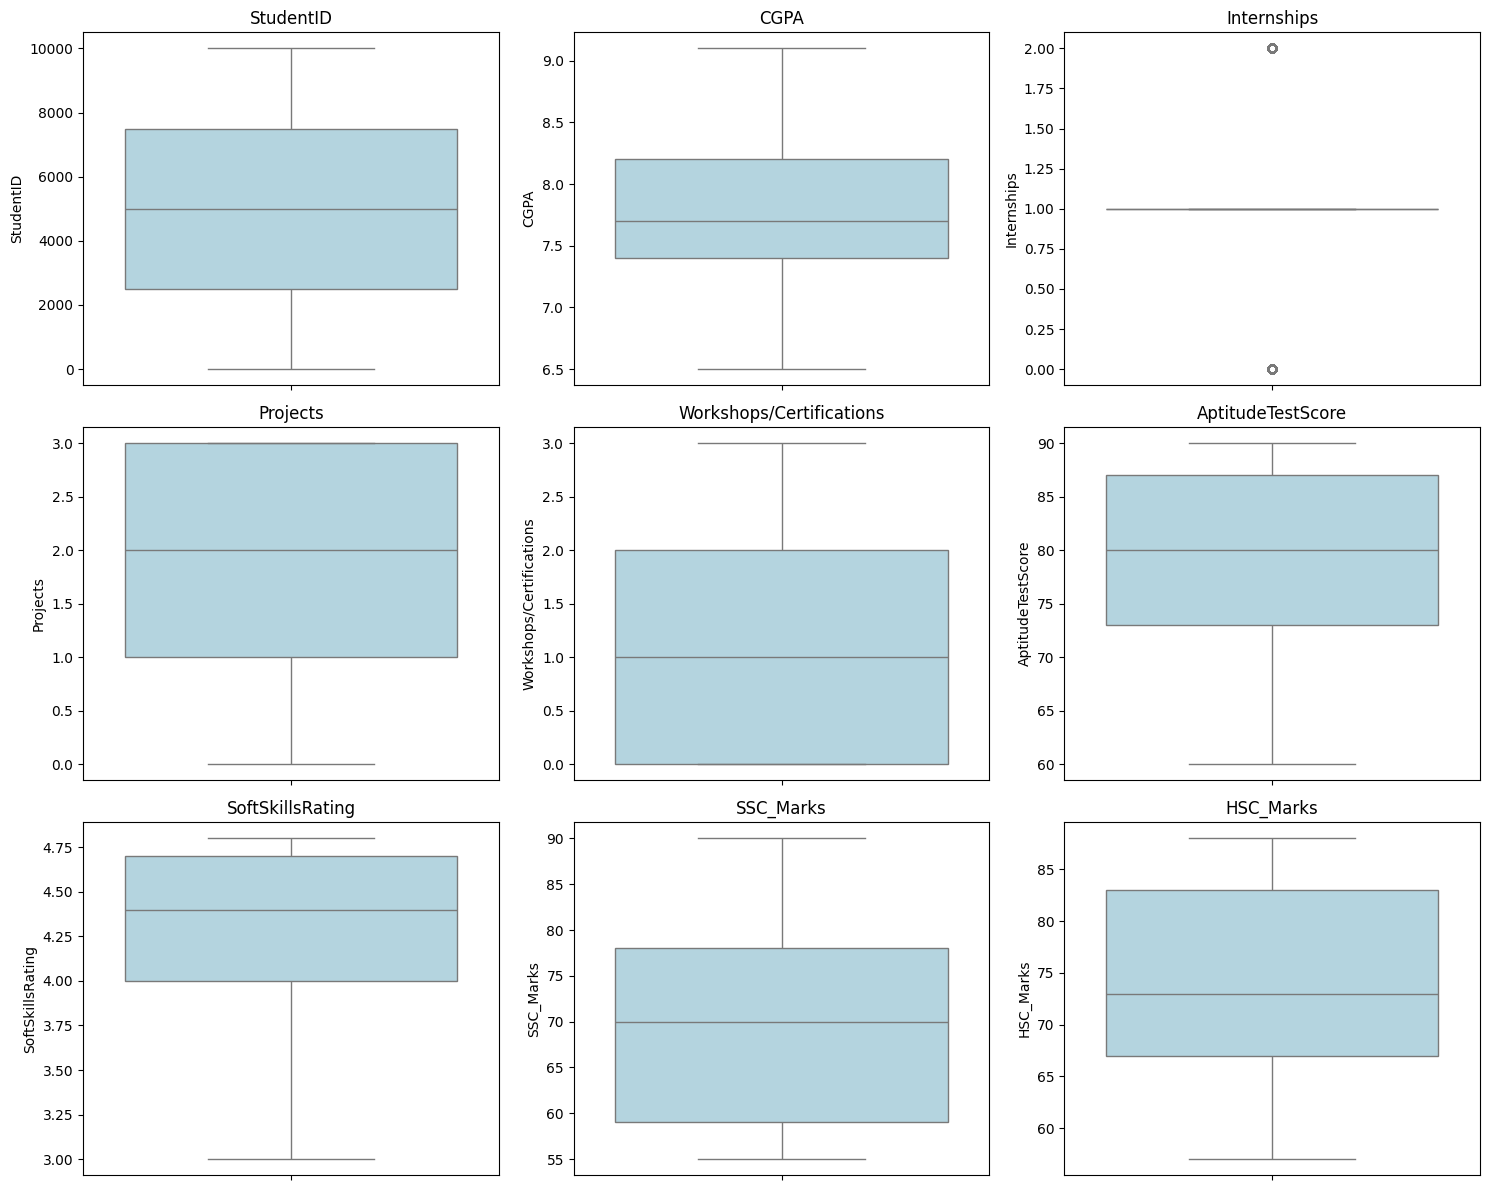

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [8]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


**EXPLORATORY DATA ANALYSIS**

**NUMERICAL ANALYSIS**

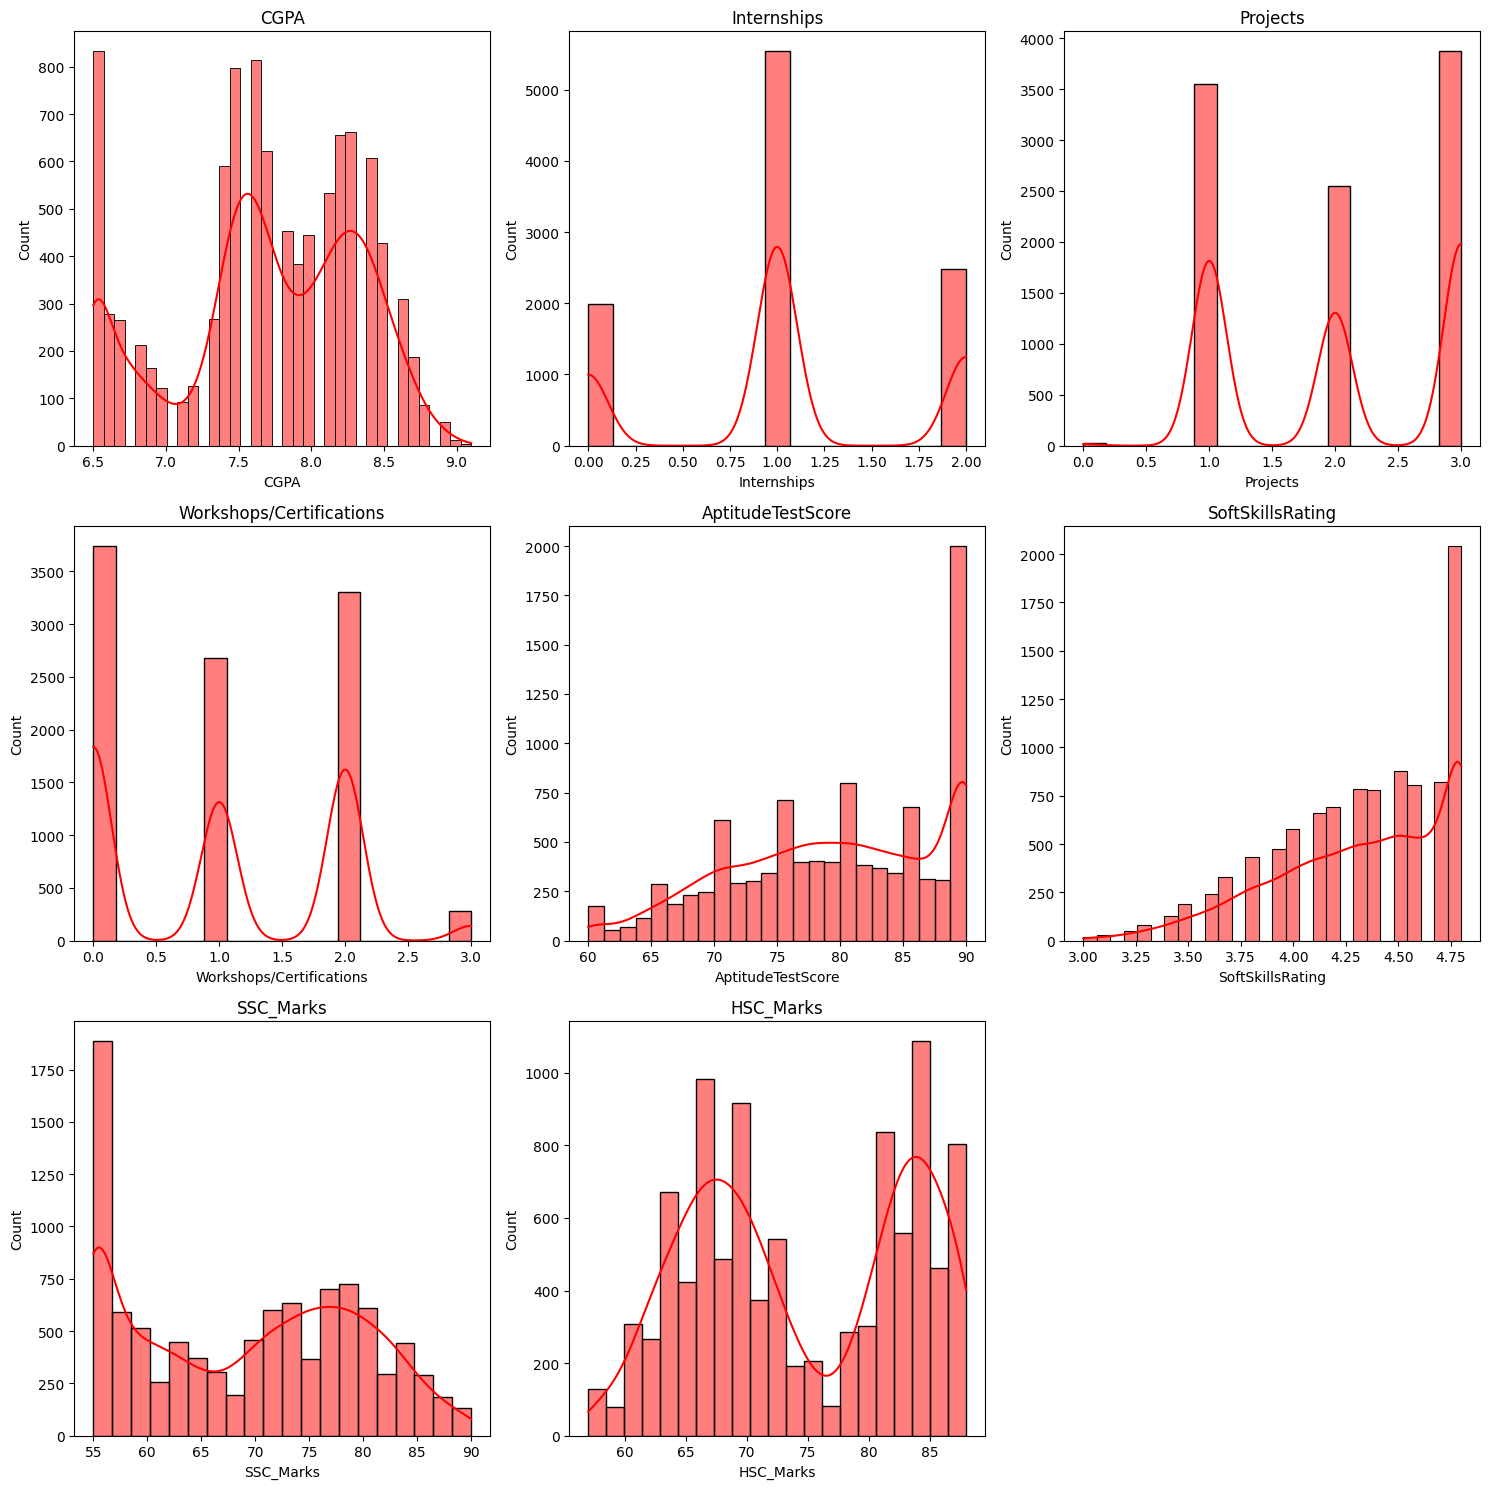

In [9]:
import math

rows = math.ceil(len(numerical_cols) / 3)
plt.figure(figsize=(15, 5 * rows))

numerical_cols.remove("StudentID")
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True, color="red")
    plt.title(col)

plt.tight_layout()
plt.show()


**CATEGORICAL ANALYSIS**

In [10]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

for col in categorical_cols:
    print(f"\n", df[col].value_counts(normalize=True)*100)


 ExtracurricularActivities
Yes    58.54
No     41.46
Name: proportion, dtype: float64

 PlacementTraining
Yes    73.18
No     26.82
Name: proportion, dtype: float64

 PlacementStatus
NotPlaced    58.03
Placed       41.97
Name: proportion, dtype: float64


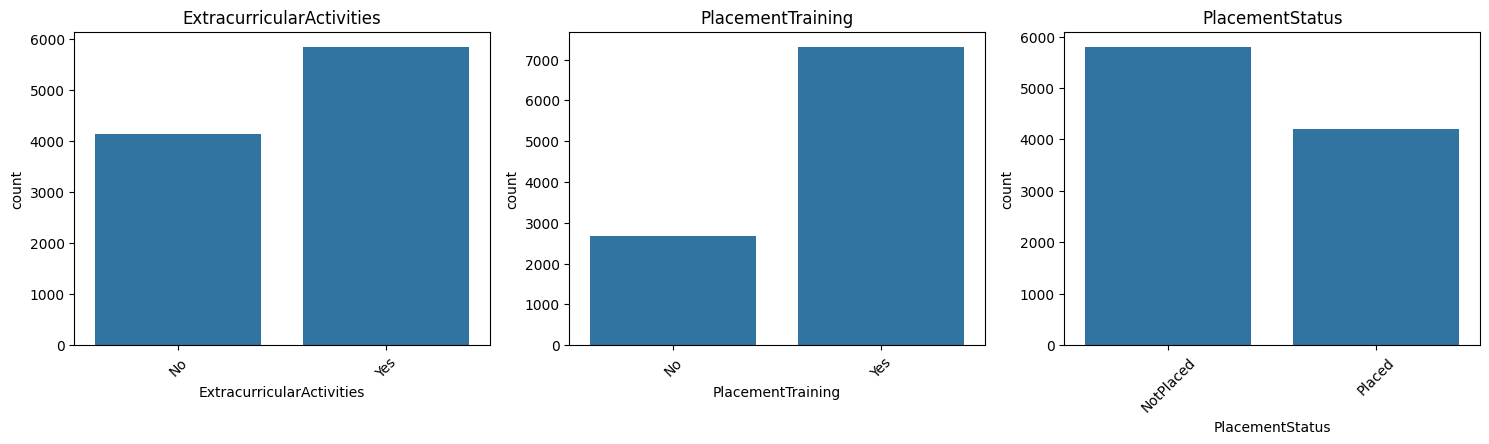

In [11]:
plt.figure(figsize=(15,12))
for i,col in enumerate(categorical_cols,1):
    plt.subplot(3,3,i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Target Relationship (Placement_Status)

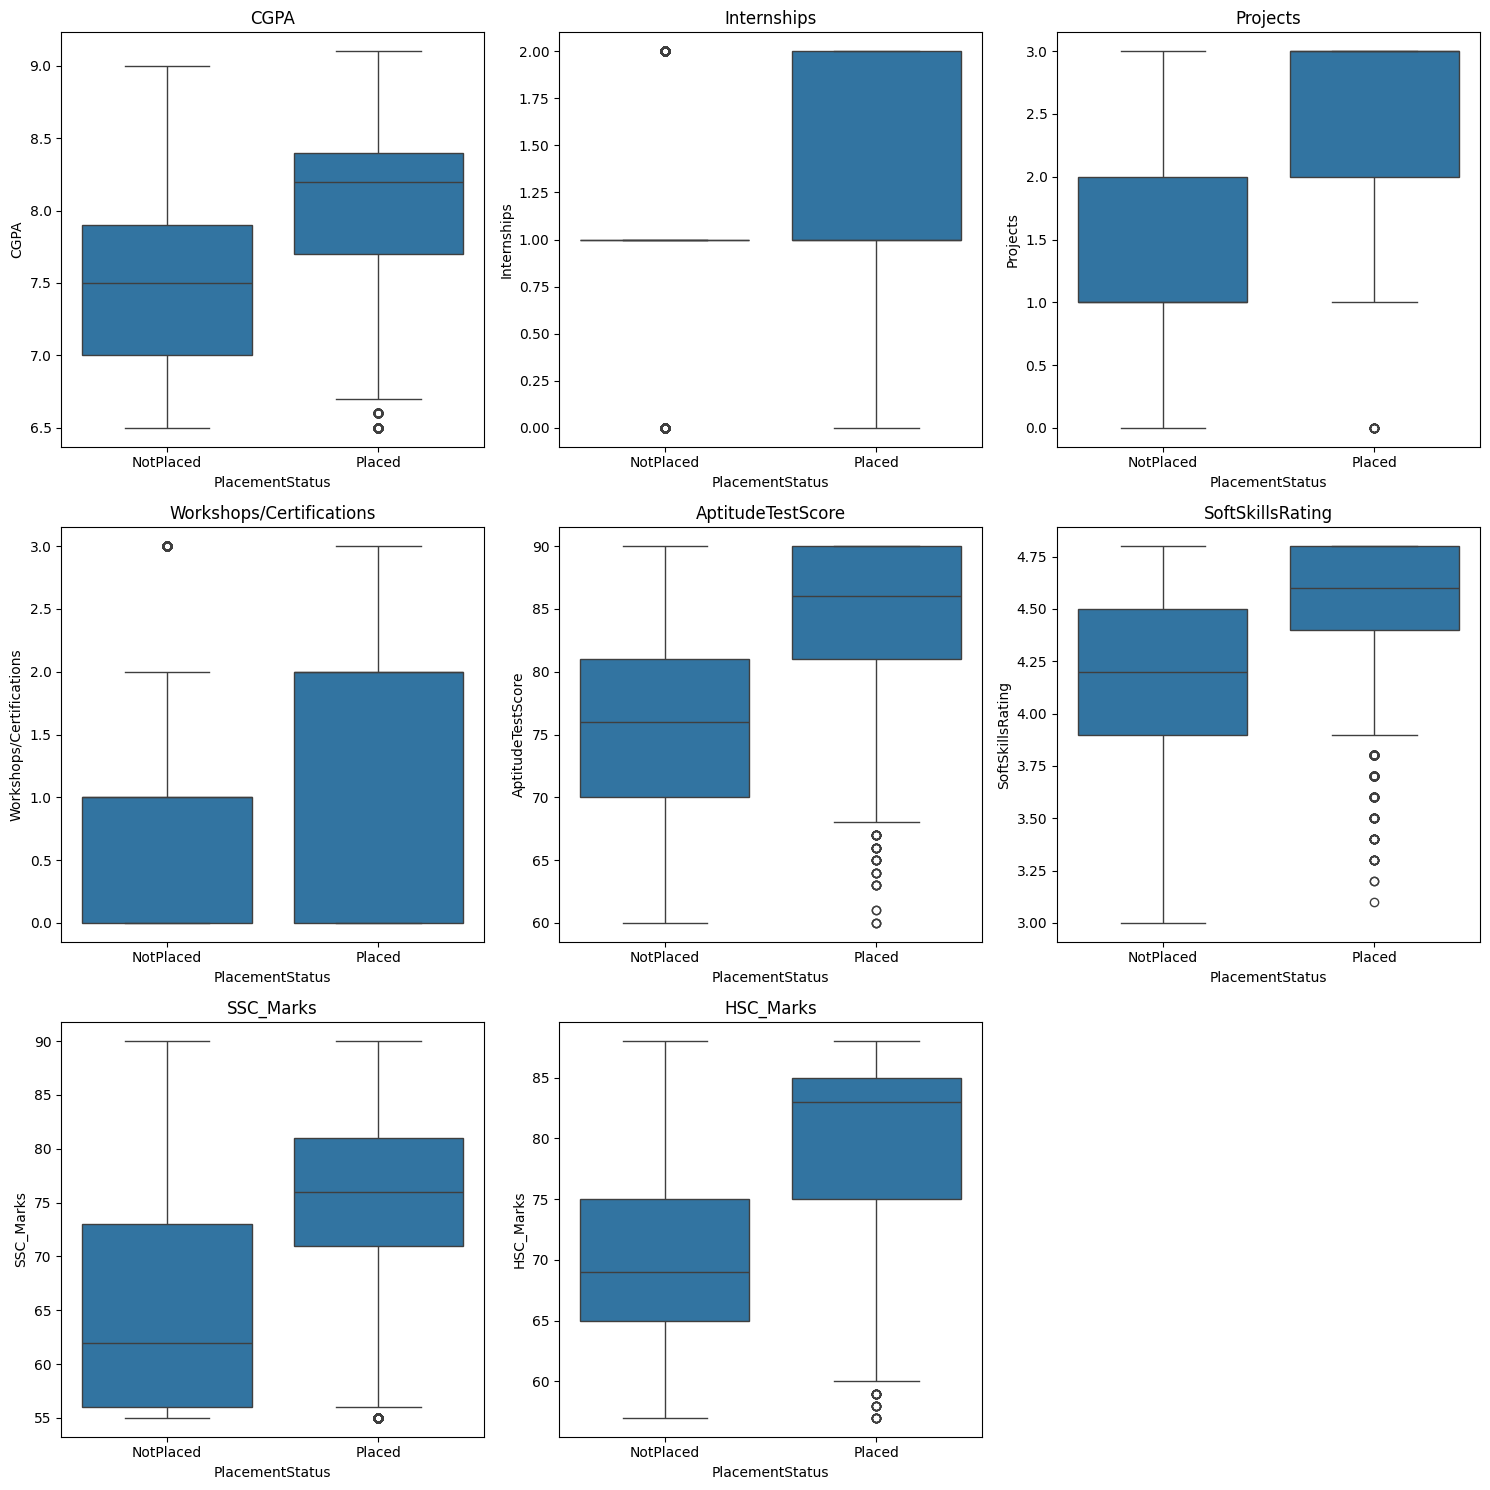

In [12]:
plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x="PlacementStatus", y=col, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()

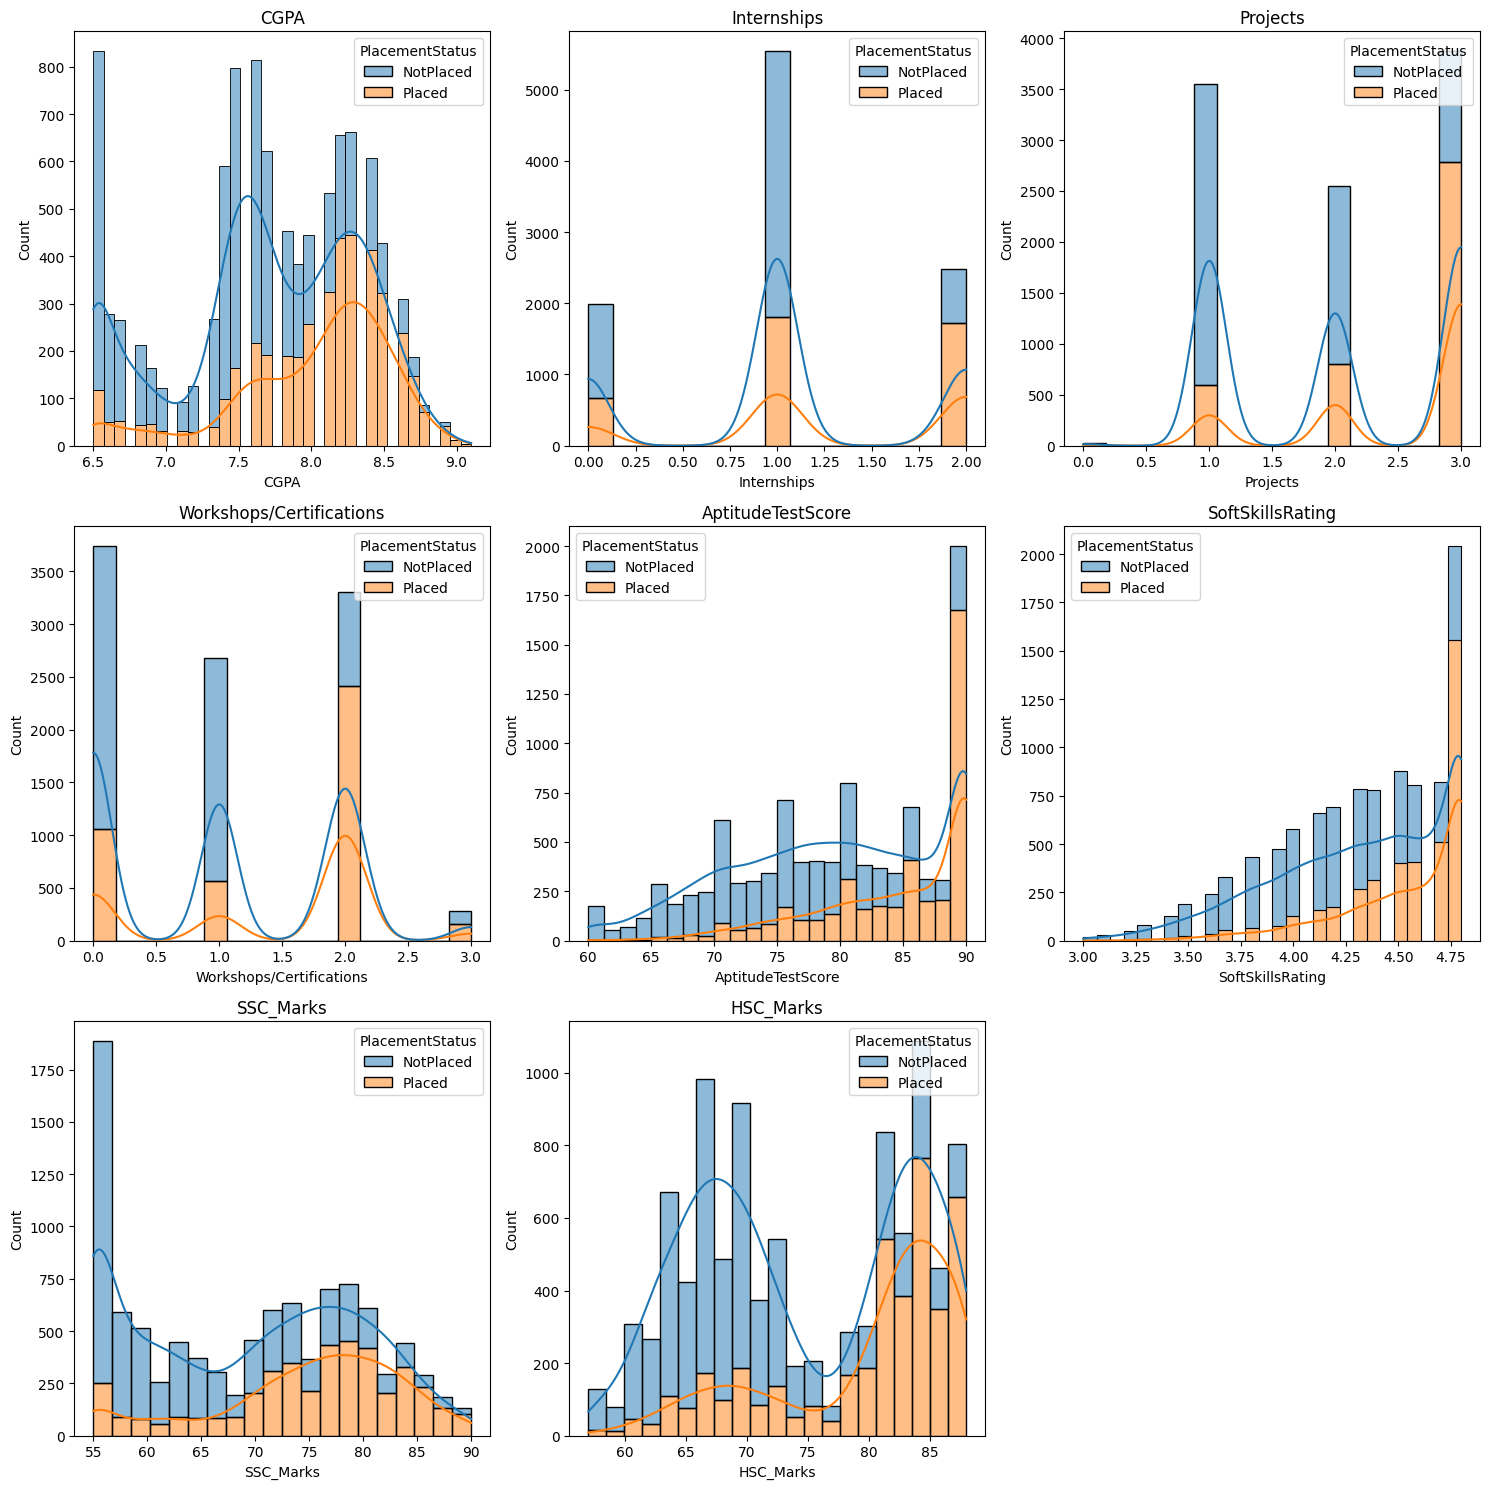

In [13]:
plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(data=df, x=col, hue="PlacementStatus", kde=True, multiple="stack")
    plt.title(col)

plt.tight_layout()
plt.show()


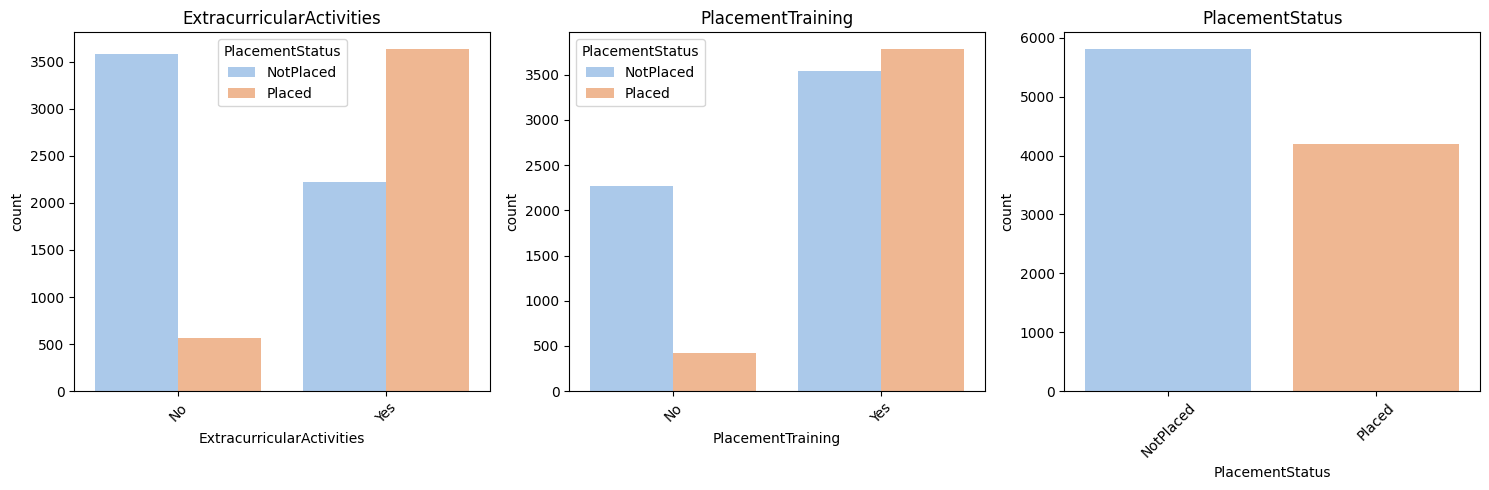

In [14]:
categorical_rows = math.ceil(len(categorical_cols) / 3)

plt.figure(figsize=(15, 5 * categorical_rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(categorical_rows, 3, i)
    sns.countplot(x=col, hue="PlacementStatus", data=df, palette="pastel")
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Correlation Analysis**

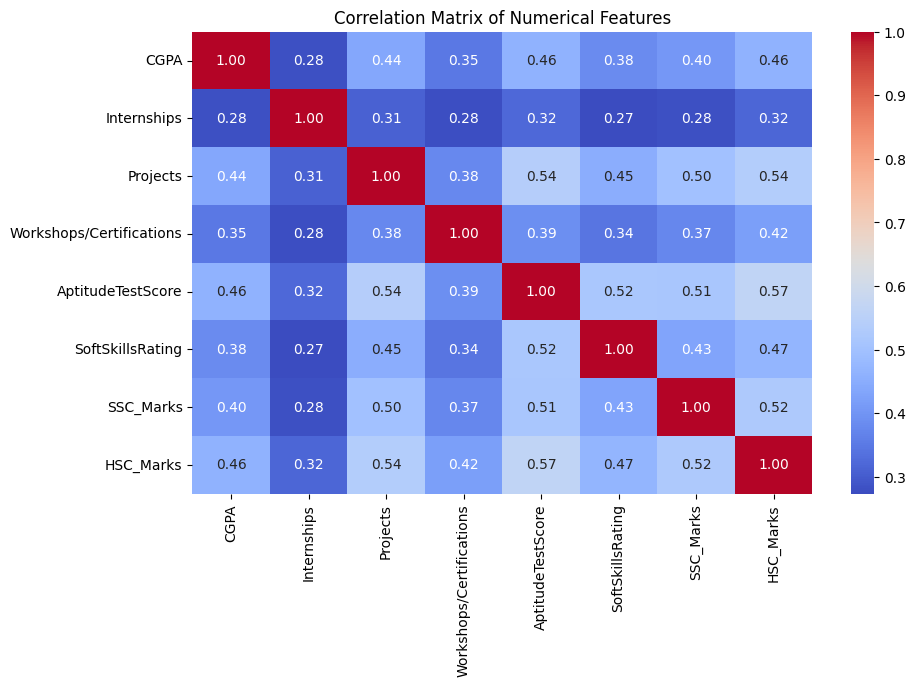

In [15]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

**FEATURE ENGINEERING**


In [16]:
print(f"Columns in the df :{df.columns.tolist()}")

Columns in the df :['StudentID', 'CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks', 'HSC_Marks', 'PlacementStatus']


In [17]:
df.drop('StudentID',axis = 1,inplace=True)

In [18]:
n,d = df.shape
print(f"No of samples {n}")
print(f"No of dimenstions {d}")

No of samples 10000
No of dimenstions 11


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       10000 non-null  float64
 1   Internships                10000 non-null  int64  
 2   Projects                   10000 non-null  int64  
 3   Workshops/Certifications   10000 non-null  int64  
 4   AptitudeTestScore          10000 non-null  int64  
 5   SoftSkillsRating           10000 non-null  float64
 6   ExtracurricularActivities  10000 non-null  object 
 7   PlacementTraining          10000 non-null  object 
 8   SSC_Marks                  10000 non-null  int64  
 9   HSC_Marks                  10000 non-null  int64  
 10  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


**ENCODING**

In [20]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
print(df[categorical_cols].to_string())

     ExtracurricularActivities PlacementTraining PlacementStatus
0                           No                No       NotPlaced
1                          Yes               Yes          Placed
2                          Yes                No       NotPlaced
3                          Yes               Yes          Placed
4                          Yes               Yes          Placed
5                          Yes                No       NotPlaced
6                           No                No       NotPlaced
7                          Yes               Yes       NotPlaced
8                           No               Yes       NotPlaced
9                          Yes               Yes          Placed
10                         Yes               Yes          Placed
11                         Yes               Yes          Placed
12                         Yes               Yes          Placed
13                          No               Yes       NotPlaced
14                       

In [21]:
df['ExtracurricularActivities'].unique()
df['PlacementTraining'].unique()
df['PlacementStatus'].unique()

array(['NotPlaced', 'Placed'], dtype=object)

**One-Hot Encoding**

In [22]:
# mapping the categorical features (encoding)
df['ExtracurricularActivities'] = df['ExtracurricularActivities'].map({'Yes':1,'No':0})
df['PlacementTraining'] = df['PlacementTraining'].map({'Yes':1,'No':0})
df["PlacementStatus"] = df["PlacementStatus"].map({'Placed':1,'NotPlaced':0})

print("Preprocessing is complete. StudentID is dropped and fields are encoded.")

Preprocessing is complete. StudentID is dropped and fields are encoded.


In [23]:
df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,8.9,0,3,2,90,4.0,1,1,78,82,1
2,7.3,1,2,2,82,4.8,1,0,79,80,0
3,7.5,1,1,2,85,4.4,1,1,81,80,1
4,8.3,1,2,2,86,4.5,1,1,74,88,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       10000 non-null  float64
 1   Internships                10000 non-null  int64  
 2   Projects                   10000 non-null  int64  
 3   Workshops/Certifications   10000 non-null  int64  
 4   AptitudeTestScore          10000 non-null  int64  
 5   SoftSkillsRating           10000 non-null  float64
 6   ExtracurricularActivities  10000 non-null  int64  
 7   PlacementTraining          10000 non-null  int64  
 8   SSC_Marks                  10000 non-null  int64  
 9   HSC_Marks                  10000 non-null  int64  
 10  PlacementStatus            10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


**DATA SPLITTING**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Defining X (features) and y (target)
X = df.drop('PlacementStatus', axis=1)
y = df['PlacementStatus']

# 2. Creating the train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data is split and scaled.")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")

Data is split and scaled.
X_train shape: (8000, 10)
X_test shape: (2000, 10)


**MODEL TRAINING**

**Training and Tuning using Random Forest**

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Defining a parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initializing RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=50,  # Try 50 different combinations
    cv=5,       # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available CPU cores
    verbose=1,
    random_state=42
)

# Fitting the model
print("--- Tuning Random Forest ---")
rf_random_search.fit(X_train_scaled, y_train)

print("\nBest RF Parameters Found:")
print(rf_random_search.best_params_)
print(f"\nBest RF Cross-Val Accuracy: {rf_random_search.best_score_:.4f}")

--- Tuning Random Forest ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best RF Parameters Found:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}

Best RF Cross-Val Accuracy: 0.7978


**Performance Metrics for Random Forest**

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Get the best model
best_rf = rf_random_search.best_estimator_

# Make predictions
y_pred_rf = best_rf.predict(X_test_scaled)

print("\n--- Tuned Random Forest Final Evaluation ---")
# Printing the 4 key metrics
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_rf):.4f}")

print("\nFull Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


--- Tuned Random Forest Final Evaluation ---
Accuracy:  0.8020
Precision: 0.7718
Recall:    0.7497
F1-Score:  0.7606

Full Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1161
           1       0.77      0.75      0.76       839

    accuracy                           0.80      2000
   macro avg       0.80      0.79      0.80      2000
weighted avg       0.80      0.80      0.80      2000


Confusion Matrix:
 [[975 186]
 [210 629]]


**Training and Tuning using Gradient Boosting**

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Defining a parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Initializing RandomizedSearchCV
gb_random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=gb_param_grid,
    n_iter=30, # Try 30 combinations
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fitting the model
print("\n--- Tuning Gradient Boosting ---")
gb_random_search.fit(X_train_scaled, y_train)

print("\nBest GBC Parameters Found:")
print(gb_random_search.best_params_)
print(f"\nBest GBC Cross-Val Accuracy: {gb_random_search.best_score_:.4f}")


--- Tuning Gradient Boosting ---
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best GBC Parameters Found:
{'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

Best GBC Cross-Val Accuracy: 0.7968


**Performance Metrics for Gradient Boosting**

In [29]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

best_gbc = gb_random_search.best_estimator_

y_pred_gbc = best_gbc.predict(X_test_scaled)

print("\n--- Tuned Gradient Boosting Final Evaluation ---")
# Printing the 4 key metrics
print(f"Accuracy:  {accuracy_score(y_test, y_pred_gbc):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gbc):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_gbc):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_gbc):.4f}")

print("\nFull Classification Report:\n", classification_report(y_test, y_pred_gbc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gbc))


--- Tuned Gradient Boosting Final Evaluation ---
Accuracy:  0.7995
Precision: 0.7664
Recall:    0.7509
F1-Score:  0.7586

Full Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1161
           1       0.77      0.75      0.76       839

    accuracy                           0.80      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.80      0.80      2000


Confusion Matrix:
 [[969 192]
 [209 630]]


**Training and Tuning using Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Defining a parameter grid for Logistic Regression
# 'C' is the inverse of regularization strength.
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# Initializing GridSearchCV
lr_grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=500),
    param_grid=lr_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fitting the model
print("\n--- Tuning Logistic Regression ---")
lr_grid_search.fit(X_train_scaled, y_train)

print("\nBest LR Parameters Found:")
print(lr_grid_search.best_params_)
print(f"\nBest LR Cross-Val Accuracy: {lr_grid_search.best_score_:.4f}")


--- Tuning Logistic Regression ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best LR Parameters Found:
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Best LR Cross-Val Accuracy: 0.7968


**Performance metrics for Logistic Regression**

In [32]:
# --- THIS CELL IS UPDATED ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Get the best model
best_lr = lr_grid_search.best_estimator_

# Make predictions
y_pred_lr = best_lr.predict(X_test_scaled)

print("\n--- Tuned Logistic Regression Final Evaluation ---")
# Printing the 4 key metrics
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_lr):.4f}")

print("\nFull Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


--- Tuned Logistic Regression Final Evaluation ---
Accuracy:  0.8080
Precision: 0.7692
Recall:    0.7747
F1-Score:  0.7720

Full Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1161
           1       0.77      0.77      0.77       839

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000


Confusion Matrix:
 [[966 195]
 [189 650]]


**Training and Tuning using Voting Classifier**

In [33]:
from sklearn.ensemble import VotingClassifier

# 1. Creating a list of our three tuned models
estimators = [
    ('logistic_reg', best_lr),     # Your best model so far!
    ('random_forest', best_rf),
    ('grad_boosting', best_gbc)
]

# 2. Creating the Voting Classifier
# We are using 'soft' voting to average the prediction probabilities, which is usually better.
# All our models support this.
voting_clf = VotingClassifier(
    estimators=estimators,
    voting='soft'
)

# 3. Fitting and evaluating the Voting Classifier
print("--- Fitting Voting Classifier ---")
voting_clf.fit(X_train_scaled, y_train)

print("\n--- Voting Classifier Final Evaluation ---")
y_pred_voting = voting_clf.predict(X_test_scaled)

print(f"Accuracy:  {accuracy_score(y_test, y_pred_voting):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_voting):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_voting):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_voting):.4f}")

print("\nFull Classification Report:\n", classification_report(y_test, y_pred_voting))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))

--- Fitting Voting Classifier ---

--- Voting Classifier Final Evaluation ---
Accuracy:  0.8055
Precision: 0.7737
Recall:    0.7580
F1-Score:  0.7658

Full Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1161
           1       0.77      0.76      0.77       839

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000


Confusion Matrix:
 [[975 186]
 [203 636]]


**Training and Tuning using SVM**

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# 1. Defining a parameter grid for SVM
# 'C' is the regularization parameter
# 'gamma' is the kernel coefficient
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf'] # 'rbf' kernel is the most powerful and common
}

# 2. Initializing RandomizedSearchCV (using the 'fast' settings for your deadline)
svm_random_search = RandomizedSearchCV(
    estimator=SVC(probability=True, random_state=42), 
    param_distributions=svm_param_grid,
    n_iter=10,  # Trying 10 combinations
    cv=3,       # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# 3. Fitting the model
print("\n--- Tuning Support Vector Machine (SVM) ---")
svm_random_search.fit(X_train_scaled, y_train)

print("\nBest SVM Parameters Found:")
print(svm_random_search.best_params_)
print(f"\nBest SVM Cross-Val Accuracy: {svm_random_search.best_score_:.4f}")


--- Tuning Support Vector Machine (SVM) ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best SVM Parameters Found:
{'kernel': 'rbf', 'gamma': 0.01, 'C': 1}

Best SVM Cross-Val Accuracy: 0.7973


**Performance metrics for SVM**

In [35]:
best_svm = svm_random_search.best_estimator_

y_pred_svm = best_svm.predict(X_test_scaled)

print("\n--- Tuned SVM Final Evaluation ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_svm):.4f}")

print("\nFull Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


--- Tuned SVM Final Evaluation ---
Accuracy:  0.8070
Precision: 0.7900
Recall:    0.7354
F1-Score:  0.7617

Full Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1161
           1       0.79      0.74      0.76       839

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000


Confusion Matrix:
 [[997 164]
 [222 617]]


**Training and Tuning using KNN**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 1. Defining a parameter grid for KNN
knn_param_grid = {
    'n_neighbors': list(range(3, 21)),
    'weights': ['uniform', 'distance'], 
    'metric': ['minkowski', 'euclidean']
}

# 2. Initializing GridSearchCV
knn_grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_param_grid,
    cv=5, # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 3. Fitting the model
print("\n--- Tuning K-Nearest Neighbors (KNN) ---")
knn_grid_search.fit(X_train_scaled, y_train)

print("\nBest KNN Parameters Found:")
print(knn_grid_search.best_params_)
print(f"\nBest KNN Cross-Val Accuracy: {knn_grid_search.best_score_:.4f}")


--- Tuning K-Nearest Neighbors (KNN) ---
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best KNN Parameters Found:
{'metric': 'minkowski', 'n_neighbors': 20, 'weights': 'uniform'}

Best KNN Cross-Val Accuracy: 0.7926


**Performance metrics for KNN**

In [37]:
best_knn = knn_grid_search.best_estimator_

y_pred_knn = best_knn.predict(X_test_scaled)

print("\n--- Tuned KNN Final Evaluation ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_knn):.4f}")

print("\nFull Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


--- Tuned KNN Final Evaluation ---
Accuracy:  0.7910
Precision: 0.7661
Recall:    0.7223
F1-Score:  0.7436

Full Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1161
           1       0.77      0.72      0.74       839

    accuracy                           0.79      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.79      0.79      0.79      2000


Confusion Matrix:
 [[976 185]
 [233 606]]


**Training and Tuning using Minimum Distance Classifier**

In [38]:
from sklearn.neighbors import NearestCentroid

# 1. Initializing the model
md_clf = NearestCentroid()

# 2. Fitting the model
print("\n--- Fitting Minimum Distance Classifier (Nearest Centroid) ---")
md_clf.fit(X_train_scaled, y_train)

# 3. Making predictions
y_pred_md = md_clf.predict(X_test_scaled)

print("\n--- Minimum Distance Classifier Final Evaluation ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_md):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_md):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_md):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_md):.4f}")

print("\nFull Classification Report:\n", classification_report(y_test, y_pred_md))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_md))


--- Fitting Minimum Distance Classifier (Nearest Centroid) ---

--- Minimum Distance Classifier Final Evaluation ---
Accuracy:  0.7980
Precision: 0.7326
Recall:    0.8164
F1-Score:  0.7723

Full Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      1161
           1       0.73      0.82      0.77       839

    accuracy                           0.80      2000
   macro avg       0.79      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000


 Confusion Matrix:
 [[911 250]
 [154 685]]


So these are the models that we have tried with . We can see that accuracy is maximum when we used logistic regression

**HYPOTHESIS TESTING**

In [39]:
from scipy import stats

# 1. Separating the two groups
placed_cgpa = df[df['PlacementStatus'] == 1]['CGPA']
not_placed_cgpa = df[df['PlacementStatus'] == 0]['CGPA']

# 2. Performing the two-sample t-test
#    We use equal_var=False as the variances might be different
t_statistic, p_value = stats.ttest_ind(placed_cgpa, not_placed_cgpa, equal_var=False)

print("--- T-Test: CGPA vs. Placement Status ---")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. Interpreting the result
alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: (p < {alpha}) We REJECT the null hypothesis.")
    print("There IS a statistically significant difference in CGPA between placed and not-placed students.")
else:
    print(f"\nConclusion: (p >= {alpha}) We FAIL TO REJECT the null hypothesis.")
    print("There is NO statistically significant difference in CGPA between the two groups.")

--- T-Test: CGPA vs. Placement Status ---
T-statistic: 47.4223
P-value: 0.0000

Conclusion: (p < 0.05) We REJECT the null hypothesis.
There IS a statistically significant difference in CGPA between placed and not-placed students.


In [40]:
from scipy.stats import chi2_contingency

# 1. Creating a contingency table (crosstab)
contingency_table = pd.crosstab(df['PlacementTraining'], df['PlacementStatus'])
print("--- Chi-Square Test: Placement Training vs. Placement Status ---")
print("\nContingency Table:")
print(contingency_table)

# 2. Performing the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi2 Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. Interpreting the result
alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: (p < {alpha}) We REJECT the null hypothesis.")
    print("There IS a statistically significant association between Placement Training and Placement Status.")
else:
    print(f"\nConclusion: (p >= {alpha}) We FAIL TO REJECT the null hypothesis.")
    print("There is NO statistically significant association between the two variables.")

--- Chi-Square Test: Placement Training vs. Placement Status ---

Contingency Table:
PlacementStatus       0     1
PlacementTraining            
0                  2264   418
1                  3539  3779

Chi2 Statistic: 1046.0741
P-value: 0.0000

Conclusion: (p < 0.05) We REJECT the null hypothesis.
There IS a statistically significant association between Placement Training and Placement Status.


**PREDICTION**

In [44]:
# Finding the best model by accuracy and providing interactive prediction
from sklearn.metrics import accuracy_score

# Collecting all models and calculating their accuracies
models_dict = {}
if 'best_rf' in globals():
    y_pred = best_rf.predict(X_test_scaled)
    models_dict['RandomForest'] = {'model': best_rf, 'accuracy': accuracy_score(y_test, y_pred)}
if 'best_gbc' in globals():
    y_pred = best_gbc.predict(X_test_scaled)
    models_dict['GradientBoosting'] = {'model': best_gbc, 'accuracy': accuracy_score(y_test, y_pred)}
if 'best_lr' in globals():
    y_pred = best_lr.predict(X_test_scaled)
    models_dict['LogisticRegression'] = {'model': best_lr, 'accuracy': accuracy_score(y_test, y_pred)}
if 'best_svm' in globals():
    y_pred = best_svm.predict(X_test_scaled)
    models_dict['SVM'] = {'model': best_svm, 'accuracy': accuracy_score(y_test, y_pred)}
if 'best_knn' in globals():
    y_pred = best_knn.predict(X_test_scaled)
    models_dict['KNN'] = {'model': best_knn, 'accuracy': accuracy_score(y_test, y_pred)}
if 'md_clf' in globals():
    y_pred = md_clf.predict(X_test_scaled)
    models_dict['NearestCentroid'] = {'model': md_clf, 'accuracy': accuracy_score(y_test, y_pred)}
if 'best_voting' in globals():
    y_pred = best_voting.predict(X_test_scaled)
    models_dict['VotingClassifier'] = {'model': best_voting, 'accuracy': accuracy_score(y_test, y_pred)}


if models_dict:
    best_model_name = max(models_dict, key=lambda x: models_dict[x]['accuracy'])
    best_model = models_dict[best_model_name]['model']
    best_accuracy = models_dict[best_model_name]['accuracy']
else:
    raise ValueError("No models found. Please run the model training cells first.")


def ask_float(prompt):
    while True:
        val = input(f"{prompt}: ").strip()
        try:
            return float(val)
        except ValueError:
            print("Please enter a valid number.")

def ask_int(prompt):
    while True:
        val = input(f"{prompt}: ").strip()
        try:
            return int(val)
        except ValueError:
            print("Please enter a valid integer.")

def ask_yes_no(prompt):
    while True:
        val = input(f"{prompt} (Yes/No): ").strip().lower()
        if val in ['yes', 'y', '1']: return 1
        if val in ['no', 'n', '0']: return 0
        print("Please answer Yes or No.")

# Collecting inputs for the 10 features
print("\nEnter student details:")
sample = {
    'CGPA': ask_float('CGPA (e.g., 7.8)'),
    'Internships': ask_int('Internships (count)'),
    'Projects': ask_int('Projects (count)'),
    'Workshops/Certifications': ask_int('Workshops/Certifications (count)'),
    'AptitudeTestScore': ask_int('AptitudeTestScore (0-100)'),
    'SoftSkillsRating': ask_float('SoftSkillsRating (1-5)'),
    'ExtracurricularActivities': ask_yes_no('ExtracurricularActivities (Yes/No)'),
    'PlacementTraining': ask_yes_no('PlacementTraining (Yes/No)'),
    'SSC_Marks': ask_int('SSC_Marks (0-100)'),
    'HSC_Marks': ask_int('HSC_Marks (0-100)')
}


assert 'X' in globals(), "Training features X not found in session. Please run the notebook from the top."
sample_df = pd.DataFrame([sample])


for col in X.columns:
    if col not in sample_df.columns:
        sample_df[col] = 0
sample_df = sample_df[X.columns]


assert 'scaler' in globals(), "Scaler not found. Please run the scaling cell first."
sample_transformed = scaler.transform(sample_df)

# Predicting class and probability
pred_class = best_model.predict(sample_transformed)[0]
try:
    proba = best_model.predict_proba(sample_transformed)[:, 1][0]
except Exception:
    try:
        scores = best_model.decision_function(sample_transformed)
        smin, smax = scores.min(), scores.max()
        proba = float((scores[0] - smin) / (smax - smin + 1e-8))
    except Exception:
        proba = None

label_map = {1: 'Placed', 0: 'NotPlaced'}
pred_label = label_map.get(int(pred_class), str(pred_class))

print("\n=== Prediction Result ===")
print(f"Prediction: {pred_label}")
if proba is not None:
    print(f"Placement Probability: {proba:.3f}")
else:
    print("Probability not available for this model.")
print(f"\nModel used: {best_model_name} (Accuracy: {best_accuracy:.4f})")



Enter student details:


CGPA (e.g., 7.8):  9
Internships (count):  3
Projects (count):  3
Workshops/Certifications (count):  2
AptitudeTestScore (0-100):  90
SoftSkillsRating (1-5):  5
ExtracurricularActivities (Yes/No) (Yes/No):  No
PlacementTraining (Yes/No) (Yes/No):  Yes
SSC_Marks (0-100):  95
HSC_Marks (0-100):  90



=== Prediction Result ===
Prediction: Placed
Placement Probability: 0.915

Model used: LogisticRegression (Accuracy: 0.8080)
